<a href="https://colab.research.google.com/github/kumartr/fastai_nbs/blob/master/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *
from fastai.utils.mem import *

In [0]:
from fastai.utils.collect_env import *
#show_install(True)

In [0]:
import os

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [6]:
from google.colab import drive
 # This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
path = Path('/content/drive/My Drive/dogs_cats/') 
path.ls()

[PosixPath('/content/drive/My Drive/dogs_cats/train.zip'),
 PosixPath('/content/drive/My Drive/dogs_cats/test1.zip')]

In [0]:
!mkdir train
!cp '/content/drive/My Drive/dogs_cats/train.zip' '/content/train/'

In [9]:
os.chdir('/content/train')
!unzip train.zip
os.listdir()

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

['train', 'train.zip']

In [0]:
!mkdir /content/NerveClassify

In [0]:
!mkdir /content/NerveClassify/Nerve
!mkdir /content/NerveClassify/NoNerve

In [0]:
!ls -al /content/NerveClassify/NoNerve

total 8
drwxr-xr-x 2 root root 4096 Dec  9 08:49 .
drwxr-xr-x 4 root root 4096 Dec  9 08:49 ..


In [0]:
os.listdir('/content/drive/My Drive/Nerve/')

['2_MEDIAN   B_20191026_103751_0001.MP4',
 '3_MEDIAN   C_20191026_103907_0001.MP4',
 '4_MEDIAN   D_20191026_104128_0001.MP4',
 '5_MEDIAN   E_20191026_110258_0001.MP4',
 'NoNerve',
 '1_MEDIAN_A_20191026_103606_0001.MP4']

In [0]:
os.listdir('/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422')

['2020 1_NO NERVE 1_20191206_180422.pdf',
 '2020 1_NO NERVE 1_20191206_180422_0001.MP4']

In [0]:
!cp '/content/drive/My Drive/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4' '/content/NerveClassify/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4'

In [0]:
os.chdir('/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422/')

In [0]:
!cp '/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422/2020 1_NO NERVE 1_20191206_180422_0001.MP4'  '/content/NerveClassify/NoNerve/2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
os.chdir('/content/NerveClassify/Nerve/')

In [0]:
os.listdir()

['1_MEDIAN_A_20191026_103606_0001.MP4']

In [0]:
!ffmpeg -i 1_MEDIAN_A_20191026_103606_0001.MP4  -vf fps=42 Nerve_%d.png

In [0]:
os.listdir()

In [0]:
!rm '1_MEDIAN_A_20191026_103606_0001.MP4'

In [0]:
os.chdir('/content/NerveClassify/NoNerve/')
os.listdir()

['2020_1_NO_NERVE_1_20191206_180422_0001.MP4']

In [0]:
os.listdir()

['2020 1_NO NERVE 1_20191206_180422',
 '2020_1_NO_NERVE_1_20191206_180422_0001.MP4']

In [0]:
!ffmpeg -i 2020_1_NO_NERVE_1_20191206_180422_0001.MP4  -vf fps=42 NoNerve_%d.png

In [0]:
!rm '2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
#!rmdir '2020 1_NO NERVE 1_20191206_180422'

In [0]:
os.listdir()

In [0]:
os.chdir('/content/train/train/')
os.listdir()

In [0]:
path=os.getcwd()

In [20]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/content/train/train/cat.10433.jpg'),
 PosixPath('/content/train/train/dog.10199.jpg'),
 PosixPath('/content/train/train/cat.9223.jpg'),
 PosixPath('/content/train/train/cat.82.jpg'),
 PosixPath('/content/train/train/dog.12029.jpg')]

In [0]:
#pat = r'/([^/]+)_\d+.jpg$'
pat = r'/([^/.]+).\d+.jpg$'

In [0]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

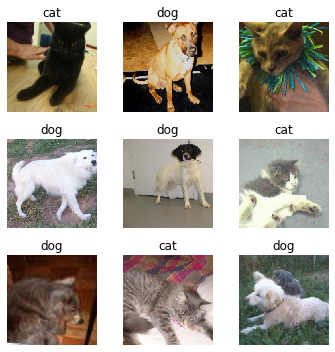

In [55]:
data.show_batch(rows=3, figsize=(5,5))

In [56]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 78.1MB/s]


In [57]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.088646,0.047057,0.015400,04:08
1,0.052603,0.029265,0.008800,04:00
2,0.035955,0.028833,0.009200,04:08
3,0.037563,0.026532,0.008200,04:18


In [0]:
learn.save('stage-1')

In [59]:
interp = ClassificationInterpretation.from_learner(learn)

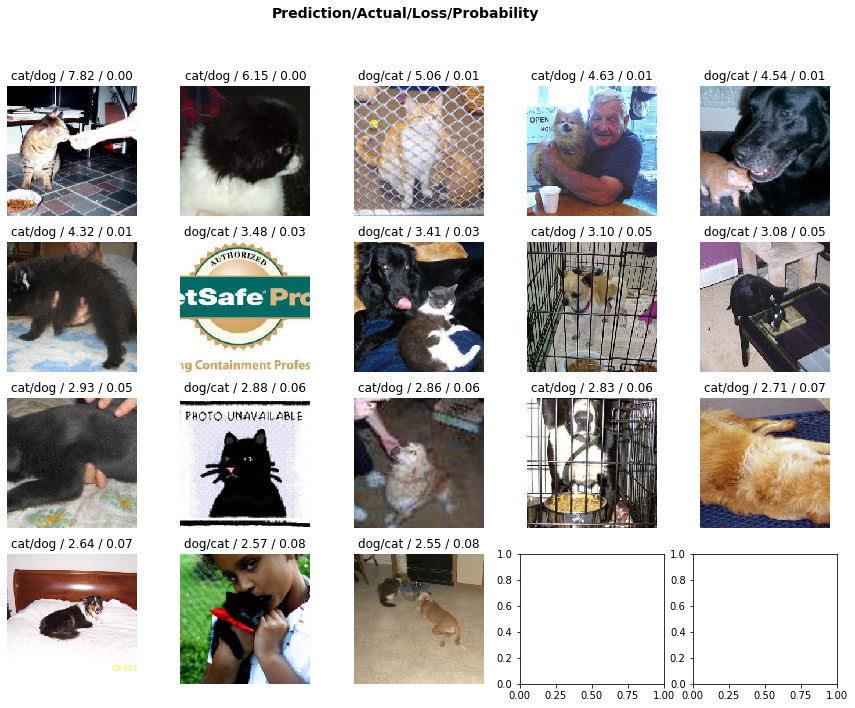

In [60]:
interp.plot_top_losses(18, figsize=(15,11))

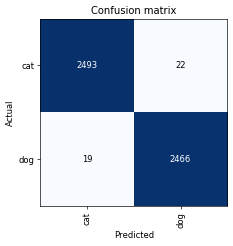

In [61]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [0]:
learn.unfreeze()

In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


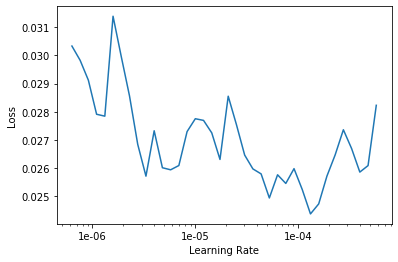

In [66]:
learn.recorder.plot(skip_end=10)

In [0]:
learn.load('stage-1');

In [67]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.030477,0.024210,0.007600,04:28
1,0.022210,0.024115,0.007200,04:25


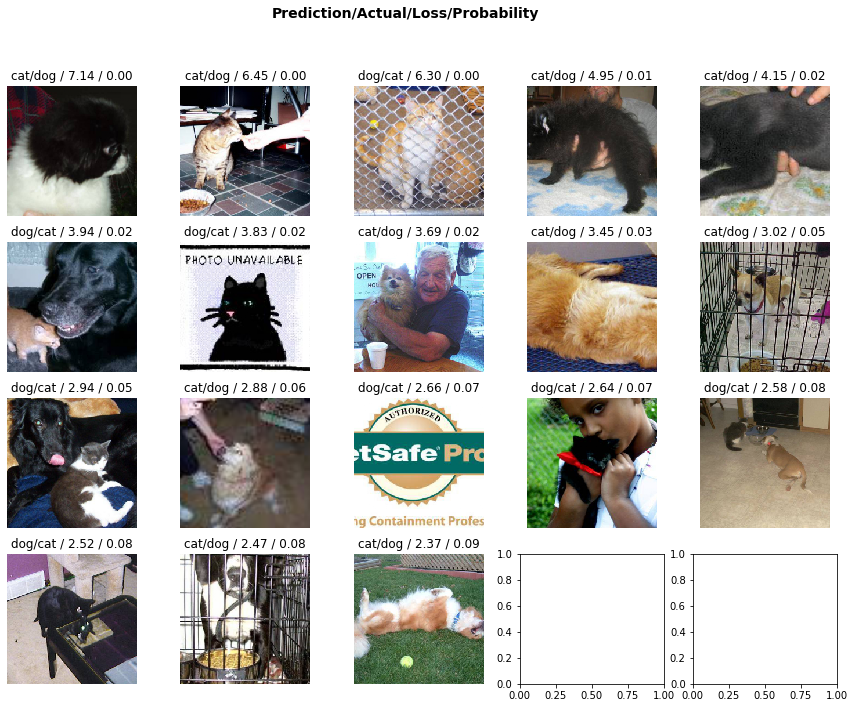

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(18, figsize=(15,11))

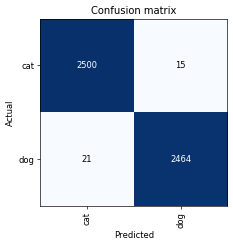

In [69]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [0]:
learn.save('stage-2')